##**Mounting Drive**

In [5]:
# from google.colab import drive
# import os
# drive.mount('/content/drive', force_remount=True)
# os.chdir('/content/drive/MyDrive/Personal_Projects')

##**Random Forest Classifier**

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 

**Pre-Processing**

In [7]:
data = pd.read_csv("Credit_Scoring.csv")
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,94.562648,4.200000
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,34.065934,7.083871


In [8]:
data.shape

(4446, 16)

In [9]:
# Checking if any Missing Values are there in the Dataset
data.isnull().any()

Status       False
Seniority    False
Home         False
Time         False
Age          False
Marital      False
Records      False
Job          False
Expenses     False
Income       False
Assets       False
Debt         False
Amount       False
Price        False
Finrat       False
Savings      False
dtype: bool

In [10]:
# Checking if any categorical Features are there in the Dataset
categorical_data = data.select_dtypes(exclude=[np.number])
print ("There are {} categorical Columns in Dataset".format(categorical_data.shape[1]))

There are 5 categorical Columns in Dataset


In [11]:
# Name of all the Categorical Features Present in the Dataset
categorical_data.any()

Status     True
Home       True
Marital    True
Records    True
Job        True
dtype: bool

In [12]:
encoder =  LabelEncoder()
data['Status'] = encoder.fit_transform(data['Status'].astype('str'))
data['Home'] = encoder.fit_transform(data['Home'].astype('str'))
data['Marital'] = encoder.fit_transform(data['Marital'].astype('str'))
data['Job'] = encoder.fit_transform(data['Job'].astype('str'))
data['Records'] = encoder.fit_transform(data['Records'].astype('str'))

In [13]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,1,9,5,60,30,1,0,1,73,129,0,0,800,846,94.562648,4.200000
1,1,17,5,60,58,4,0,0,48,131,0,0,1000,1658,60.313631,4.980000
2,0,10,2,36,46,1,1,1,90,200,3000,0,2000,2985,67.001675,1.980000
3,1,0,5,60,24,3,0,0,63,182,2500,0,900,1325,67.924528,7.933333
4,1,0,5,36,26,3,0,0,46,107,0,0,310,910,34.065934,7.083871


In [14]:
#Checking Data Types of the Features for Confirmation
data.dtypes

Status         int32
Seniority      int64
Home           int32
Time           int64
Age            int64
Marital        int32
Records        int32
Job            int32
Expenses       int64
Income         int64
Assets         int64
Debt           int64
Amount         int64
Price          int64
Finrat       float64
Savings      float64
dtype: object

In [15]:
# Value Counts of 'GOOD' Status and 'BAD' Status
# 'GOOD': 1 and 'BAD': 0
data.Status.value_counts()

1    3197
0    1249
Name: Status, dtype: int64

In [20]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values
Y = pd.get_dummies(y).values

In [21]:
y.shape, X.shape, Y.shape, len(y), len(X), len(Y)

((4446,), (4446, 15), (4446, 2), 4446, 4446, 4446)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [23]:
X_train.size, X_test.size, y_train.size, y_test.size, data.size 

(53340, 13350, 3556, 890, 71136)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
rf = RandomForestClassifier(n_estimators = 70) 
rf.fit(X_train, y_train) 
y_pred = rf.predict(X_test) 

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.51      0.57       252
           1       0.82      0.89      0.85       638

    accuracy                           0.78       890
   macro avg       0.74      0.70      0.71       890
weighted avg       0.77      0.78      0.77       890



In [27]:
confusion_matrix(y_test, y_pred)

array([[128, 124],
       [ 69, 569]], dtype=int64)

In [28]:
round(accuracy_score(y_test, y_pred), 2)

0.78

In [29]:
round(average_precision_score(y_test, y_pred), 2)

0.81

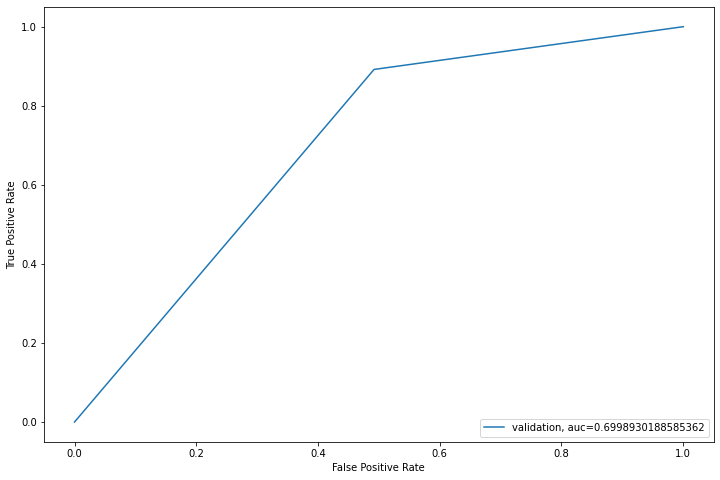

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

<AxesSubplot:>

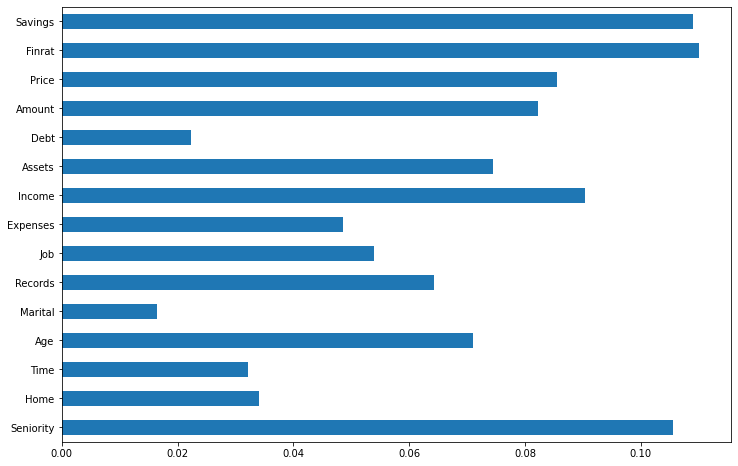

In [42]:
importances=pd.Series(rf.feature_importances_, index=data.iloc[:,1:].columns)
importances.plot(kind='barh', figsize=(12,8))

<AxesSubplot:>

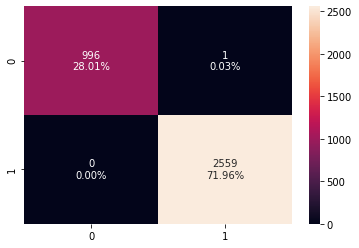

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm_train = confusion_matrix(y_train, rf.predict(X_train))
group_counts = ['{0:0.0f}'.format(value) for value in
                cfm_train.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cfm_train.flatten()/np.sum(cfm_train)]
labels = [f'{v1}\n{v2}'for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_train, annot=labels,fmt='')

<AxesSubplot:>

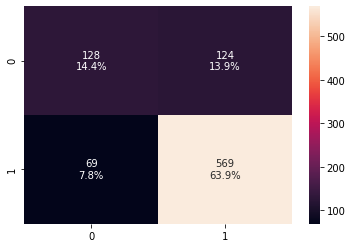

In [60]:
cfm_val = confusion_matrix(y_test, y_pred)
group_counts = [f'{value:d}' for value in
                cfm_val.flatten()]
group_percentages = [f'{value:.1%}' for value in
                     cfm_val.flatten()/np.sum(cfm_val)]
labels = [f'{v1}\n{v2}'for v1, v2 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm_val, annot=labels, fmt='')